In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('imdb_top_1000.csv')
dados.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
dados.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
# Apagar colunas
dados.pop('Poster_Link')
dados.pop('Overview')
dados.pop('Director')
dados.pop('Star1')
dados.pop('Star2')
dados.pop('Star3')
dados.pop('Star4')

0      William Sadler
1        Diane Keaton
2       Michael Caine
3        Diane Keaton
4        John Fiedler
            ...      
995       Buddy Ebsen
996     Carroll Baker
997        Donna Reed
998    William Bendix
999    Godfrey Tearle
Name: Star4, Length: 1000, dtype: object

In [5]:
dados.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"


In [6]:
dados.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
#Renomear colunas
Index = {'Series_Title': 'Nome', 'Released_Year': 'Ano de Lançamento', 'Certificate': 'Certificado', 'Runtime': 'Tempo de Duração',
         'Genre': 'Gênero',
       'IMDB_Rating': 'Nota IMDB', 'Meta_score': 'Nota Meta Score', 'No_of_Votes': 'Votos Totais', 'Gross': 'Bilheteria'}

In [8]:
dados = dados.rename(columns= Index)
dados.head()

,Nome,Ano de Lançamento,Certificado,Tempo de Duração,Gênero,Nota IMDB,Nota Meta Score,Votos Totais,Bilheteria
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,689845,"4,360,000"


In [9]:
dados.isna().sum()

Nome                   0
Ano de Lançamento      0
Certificado          101
Tempo de Duração       0
Gênero                 0
Nota IMDB              0
Nota Meta Score      157
Votos Totais           0
Bilheteria           169
dtype: int64

In [10]:
# Apagar os nulos
dados.dropna(subset = ['Certificado', 'Nota Meta Score', 'Bilheteria'], inplace = True)
dados.isna().sum()

Nome                 0
Ano de Lançamento    0
Certificado          0
Tempo de Duração     0
Gênero               0
Nota IMDB            0
Nota Meta Score      0
Votos Totais         0
Bilheteria           0
dtype: int64

In [11]:
dados[['Nota IMDB', 'Nota Meta Score']].describe()

,Nota IMDB,Nota Meta Score
count,714.000000,714.000000
mean,7.937115,77.158263
std,0.293278,12.401144
min,7.600000,28.000000
25%,7.700000,70.000000
50%,7.900000,78.000000
75%,8.100000,86.000000
max,9.300000,100.000000


In [12]:
dados[['Nota IMDB', 'Nota Meta Score']].corr()

,Nota IMDB,Nota Meta Score
Nota IMDB,1.000000,0.280894
Nota Meta Score,0.280894,1.000000


### As notas do IMDB e do Meta Score não possuem correlação

In [13]:
dados.to_csv('notas_imdb.csv', index = False)

In [14]:
import seaborn as sns

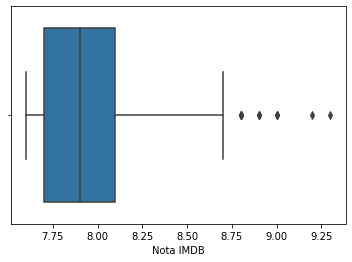

In [18]:
sns.boxplot(x = 'Nota IMDB', data = dados)

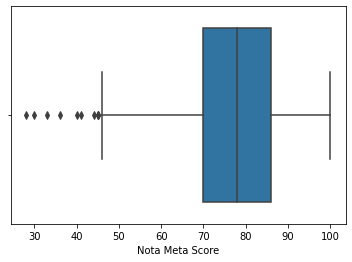

In [17]:
sns.boxplot(x = 'Nota Meta Score', data = dados)